<a href="https://colab.research.google.com/github/knuteriksen/CoronaLunch/blob/master/gender_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check if GPU is enabled

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

Install keras

In [ ]:
!pip3 install keras

Imports needed


In [ ]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from keras.optimizers import SGD

from keras.callbacks import LearningRateScheduler as LRS
from keras.preprocessing.image import ImageDataGenerator
import os


Definitions, and extractions and preprprocessing of training and test dada

In [ ]:
## Definitions
num_classes = 2

# Download training and test sets
os.system('wget https://www.dropbox.com/s/zcwlujrtz3izcw8/gender.tgz')
os.system('tar xvzf gender.tgz')


# Load
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')

y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')


# Print out information
print("X train: ", x_train.shape)
print("Y train: ", y_train.shape)
print("X test:  ", x_test.shape)
print("Y test:  ", y_test.shape)

## Transforms
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_train /= 255
x_test /= 255

print("X train: ", x_train.shape)
print("Y train: ", y_train.shape)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Helper functions

Building of model

In [99]:
model = Sequential()
model.add(keras.Input(shape=x_train.shape[1:]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())

model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())
model.add(MaxPooling2D(pool_size=2, strides=2))

#model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", padding="same"))
#model.add(BN())
#model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(1024, activation="relu"))

model.add(Dense(num_classes, activation="softmax"))

Display model

In [100]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 100, 100, 16)      448       
_________________________________________________________________
batch_normalization_130 (Bat (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 50, 50, 32)        4640      
_________________________________________________________________
batch_normalization_131 (Bat (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 25, 25, 64)      

Illustration of model

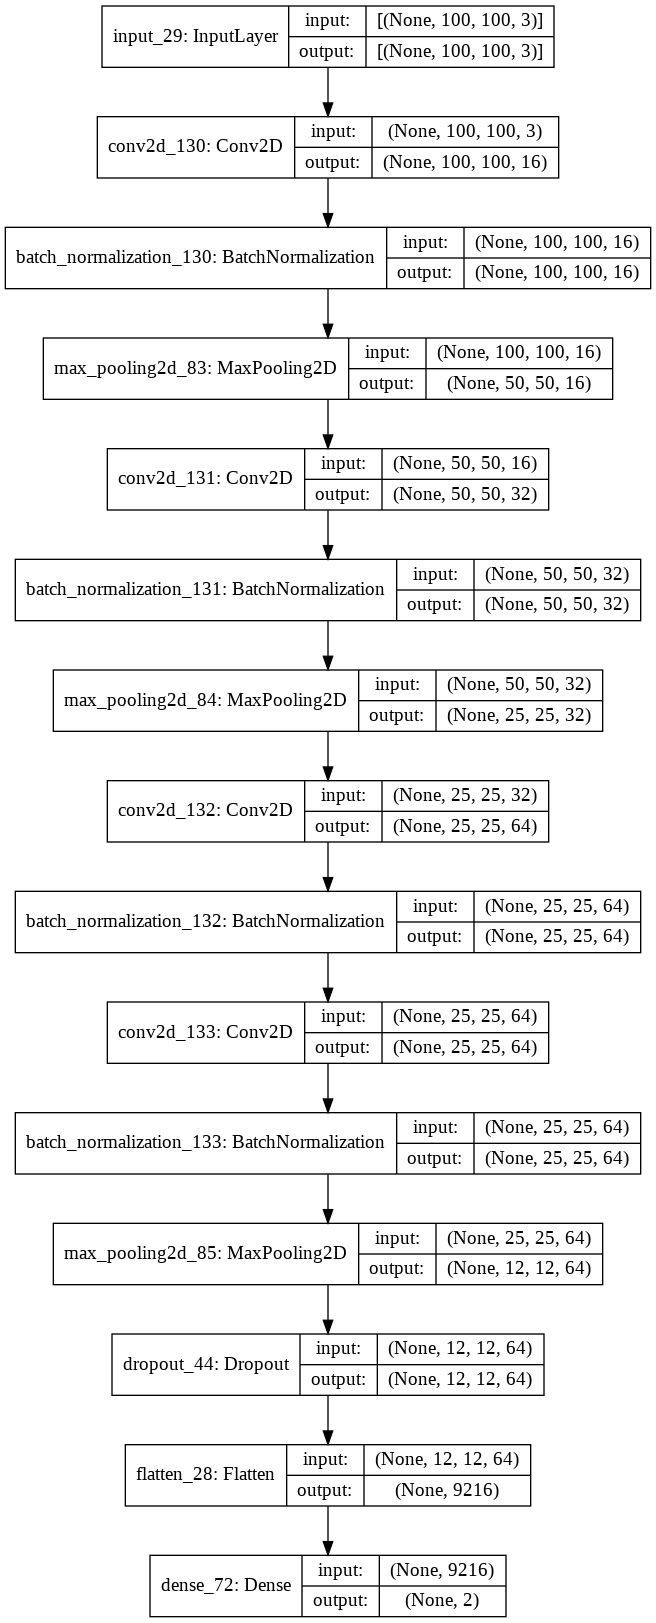

In [101]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

Compile model

In [102]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Training

In [103]:
model.fit(x=x_train,
          y=y_train,
          batch_size=96,
          epochs=30,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/30
111/111 [==============================] - 8s 63ms/step - loss: 0.8927 - accuracy: 0.7850 - val_loss: 0.7065 - val_accuracy: 0.4173
Epoch 2/30
111/111 [==============================] - 6s 57ms/step - loss: 0.3352 - accuracy: 0.9003 - val_loss: 0.7946 - val_accuracy: 0.4490
Epoch 3/30
111/111 [==============================] - 6s 57ms/step - loss: 0.2971 - accuracy: 0.9140 - val_loss: 0.3349 - val_accuracy: 0.8727
Epoch 4/30
111/111 [==============================] - 6s 57ms/step - loss: 0.2124 - accuracy: 0.9361 - val_loss: 0.4819 - val_accuracy: 0.8403
Epoch 5/30
111/111 [==============================] - 6s 58ms/step - loss: 0.1537 - accuracy: 0.9534 - val_loss: 0.3308 - val_accuracy: 0.9147
Epoch 6/30
111/111 [==============================] - 6s 57ms/step - loss: 0.1430 - accuracy: 0.9508 - val_loss: 0.1653 - val_accuracy: 0.9464
Epoch 7/30
111/111 [==============================] - 6s 57ms/step - loss: 0.1079 - accuracy: 0.9624 - val_loss: 0.1260 - val_accuracy: 0.9603

Testing

In [104]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

83/83 [==============================] - 1s 13ms/step - loss: 0.1212 - accuracy: 0.9683
Test loss: 0.12123961746692657
Test accuracy: 0.9682779312133789
